In [1]:
!pip install -q "diffusers==0.30.3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 19.5 MB/s eta 0:00:00


In [2]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from PIL import Image
import numpy as np

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

In [4]:
prompt = "A serene landscape with mountains and a lake at sunset"

# random noisy image

In [5]:
with autocast(device):
        noisy_image = torch.randn(
            (1, pipe.unet.in_channels, pipe.unet.sample_size, pipe.unet.sample_size),
            generator=torch.manual_seed(0),
        )
        noisy_image = noisy_image.to(device=device, dtype=torch.float16)

<ipython-input-5-81f26bd0fe0c>:3: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  (1, pipe.unet.in_channels, pipe.unet.sample_size, pipe.unet.sample_size),


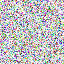

In [6]:
# Display the noisy image
noisy_pil = Image.fromarray(
    (noisy_image.squeeze().permute(1, 2, 0).cpu().numpy() * 255).astype(np.uint8)
)
noisy_pil.save("noisy_image.png")
noisy_pil

# Denoise the image

In [7]:
# Denoise the image using the Stable Diffusion model
num_inference_steps = 50
with autocast(device):
  image = pipe(
            prompt=prompt,
            num_inference_steps=num_inference_steps,
            guidance_scale=7.5,
            eta=0.0,
        ).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Generated image saved as 'generated_image.png'


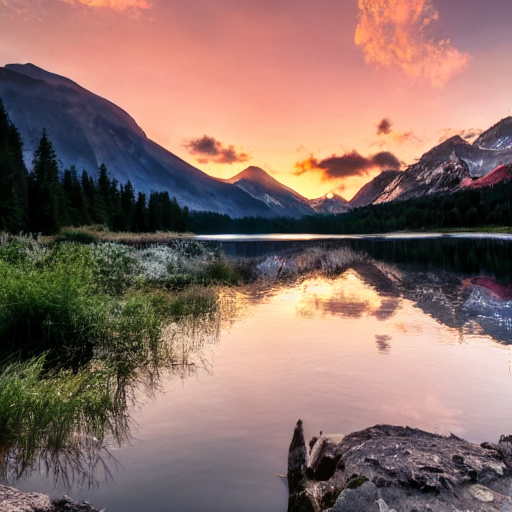

In [8]:
image.save("generated_image.png")
print("Generated image saved as 'generated_image.png'")
image

# Display denoising process

  0%|          | 0/10 [00:00<?, ?it/s]

Intermediate Image at step 10 generated, saved and displayed


  0%|          | 0/20 [00:00<?, ?it/s]

Intermediate Image at step 20 generated, saved and displayed


  0%|          | 0/30 [00:00<?, ?it/s]

Intermediate Image at step 30 generated, saved and displayed


  0%|          | 0/40 [00:00<?, ?it/s]

Intermediate Image at step 40 generated, saved and displayed


  0%|          | 0/50 [00:00<?, ?it/s]

Intermediate Image at step 50 generated, saved and displayed


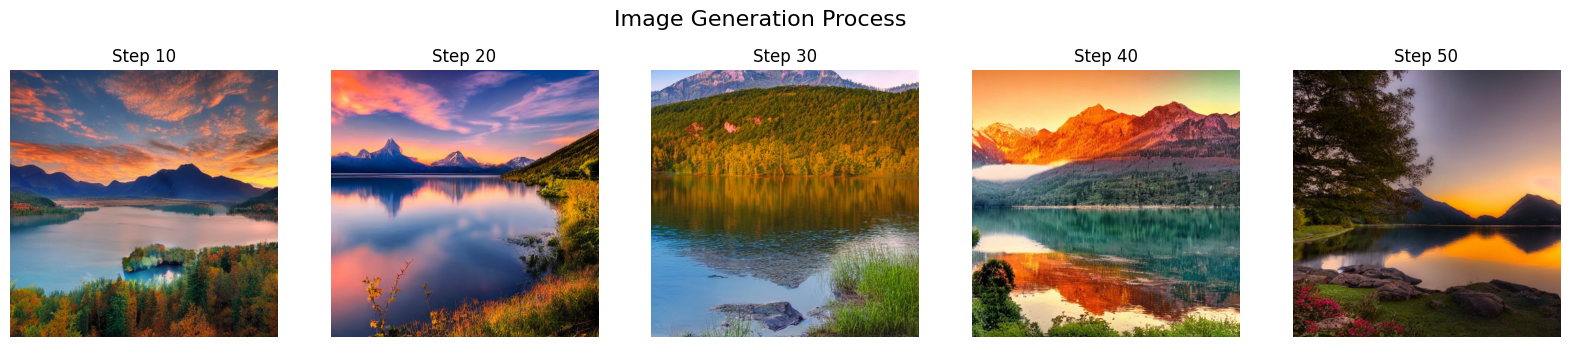

In [13]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

num_inference_steps=50
guidance_scale=7.5
step_interval=10

fig, axs = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle("Image Generation Process", fontsize=16)

for i in range(step_interval, num_inference_steps + 1, step_interval):
        image = pipe(
            prompt=prompt,
            num_inference_steps=i,
            guidance_scale=guidance_scale,
        ).images[0]
        image.save(f"denoising_step_{i}.png")

        # Display the image in the appropriate subplot
        idx = (i // step_interval) - 1
        axs[idx].imshow(image)
        axs[idx].set_title(f"Step {i}")
        axs[idx].axis('off')


        print(f"Intermediate Image at step {i} generated, saved and displayed")